## Импорт сторонних библиотек

In [2]:
import pickle
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from matplotlib.ticker import FormatStrFormatter

## Загрузка данных

In [4]:
df = pd.read_csv('data/vehicles_dataset.csv')
print(df.shape)
df.head()

(10050, 27)


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,price_category
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,good,NaN,...,pickup,silver,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,NaN,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,6 cylinders,...,SUV,black,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,NaN,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,good,NaN,...,sedan,NaN,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,NaN,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,NaN,NaN,...,wagon,white,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,NaN,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,new,4 cylinders,...,NaN,NaN,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,NaN,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium


In [5]:
df_copy = df.copy()

## Data Preparation

### Data Cleaning

#### Проверка дубликатов и их удаление.

In [6]:
# Таблица дубликатов
df_copy[df_copy.duplicated()]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,price_category
1326,7312641615,https://pueblo.craigslist.org/cto/d/pueblo-196...,pueblo,https://pueblo.craigslist.org,6500,1969.0,chevrolet,c10,good,8 cylinders,...,NaN,red,https://images.craigslist.org/00f0f_kmR1TNWM4O...,"1969 C10 runs and drives clean body, needs inn...",NaN,co,38.032300,-104.716000,2021-04-25T20:15:43-0600,low
2159,7312437164,https://yakima.craigslist.org/ctd/d/parker-201...,yakima,https://yakima.craigslist.org,19995,2015.0,subaru,xv crosstrek,NaN,4 cylinders,...,SUV,white,https://images.craigslist.org/01414_cBd43F8IeC...,2015 Subaru XV Crosstrek 2.0i Limited AWD 4dr ...,NaN,wa,46.553190,-120.475680,2021-04-25T11:30:27-0700,medium
2398,7316719393,https://miami.craigslist.org/mdc/ctd/d/miami-2...,south florida,https://miami.craigslist.org,25590,2018.0,volkswagen,golf gti s hatchback,good,NaN,...,sedan,blue,https://images.craigslist.org/00y0y_7qosBCrp0z...,Carvana is the safer way to buy a car During t...,NaN,fl,25.770000,-80.200000,2021-05-04T11:01:11-0400,high
3067,7307971804,https://redding.craigslist.org/ctd/d/sacrament...,redding,https://redding.craigslist.org,8800,2008.0,honda,accord,excellent,NaN,...,sedan,silver,https://images.craigslist.org/00S0S_kT52djO80H...,2008 *** Honda Accord EX L w/Navi 4dr Sedan 5A...,NaN,ca,38.608824,-121.400837,2021-04-16T15:01:16-0700,low
3236,7307083381,https://westernmass.craigslist.org/ctd/d/sprin...,western massachusetts,https://westernmass.craigslist.org,21990,2017.0,gmc,acadia sle-1 sport utility,good,NaN,...,SUV,white,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,NaN,ma,42.110000,-72.530000,2021-04-15T06:10:54-0400,medium
3458,7316793777,https://desmoines.craigslist.org/ctd/d/martens...,des moines,https://desmoines.craigslist.org,6700,2015.0,ford,fusion se,good,4 cylinders,...,NaN,NaN,https://images.craigslist.org/00S0S_3wmNGwLyaE...,"2015 Ford Fusion SE, 2.5 4 cyl. automatic, air...",NaN,ia,41.373000,-93.735800,2021-05-04T11:59:42-0500,low
3547,7313511076,https://athensohio.craigslist.org/ctd/d/athens...,athens,https://athensohio.craigslist.org,23590,2012.0,ford,f150 supercrew cab xlt,good,8 cylinders,...,pickup,white,https://images.craigslist.org/00J0J_4mfUGXkpYW...,Carvana is the safer way to buy a car During t...,NaN,oh,39.320000,-82.090000,2021-04-27T16:10:50-0400,high
3635,7314807085,https://oklahomacity.craigslist.org/ctd/d/norm...,oklahoma city,https://oklahomacity.craigslist.org,35988,2018.0,chevrolet,traverse premier,like new,NaN,...,NaN,NaN,https://images.craigslist.org/00i0i_4adOkOM7Vm...,THIS 2018 CHEVROLET TRAVERSE WAS JUST TRADED I...,NaN,ok,35.199000,-97.484100,2021-04-30T10:02:34-0500,high
3726,7311813732,https://youngstown.craigslist.org/ctd/d/struth...,youngstown,https://youngstown.craigslist.org,3000,2006.0,pontiac,grand prix,NaN,NaN,...,NaN,NaN,https://images.craigslist.org/00W0W_aE2NBfU8gr...,2007 PONTIAC GRAND PRIX. GOOD CONDITION IN & O...,NaN,oh,41.023719,-80.594793,2021-04-24T09:42:34-0400,low
3756,7308232496,https://raleigh.craigslist.org/ctd/d/raleigh-2...,raleigh / durham / CH,https://raleigh.craigslist.org,28990,2018.0,gmc,acadia sle-2 sport utility,good,6 cylinders,...,SUV,NaN,https://images.craigslist.org/00I0I_luAr8SgpD6...,Carvana is the safer way to buy a car During t...,NaN,nc,35.820000,-78.650000,2021-04-17T10:51:25-0400,high


In [7]:
# Размер таблицы дубликатов
print(df_copy[df_copy.duplicated()].shape)

(50, 27)


In [8]:
# Удаление дубликатов и проверка.
df_copy = df_copy[~(df_copy.duplicated())]
df_copy[df_copy.duplicated()]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,price_category


#### Проверка пропусков и их исправление.

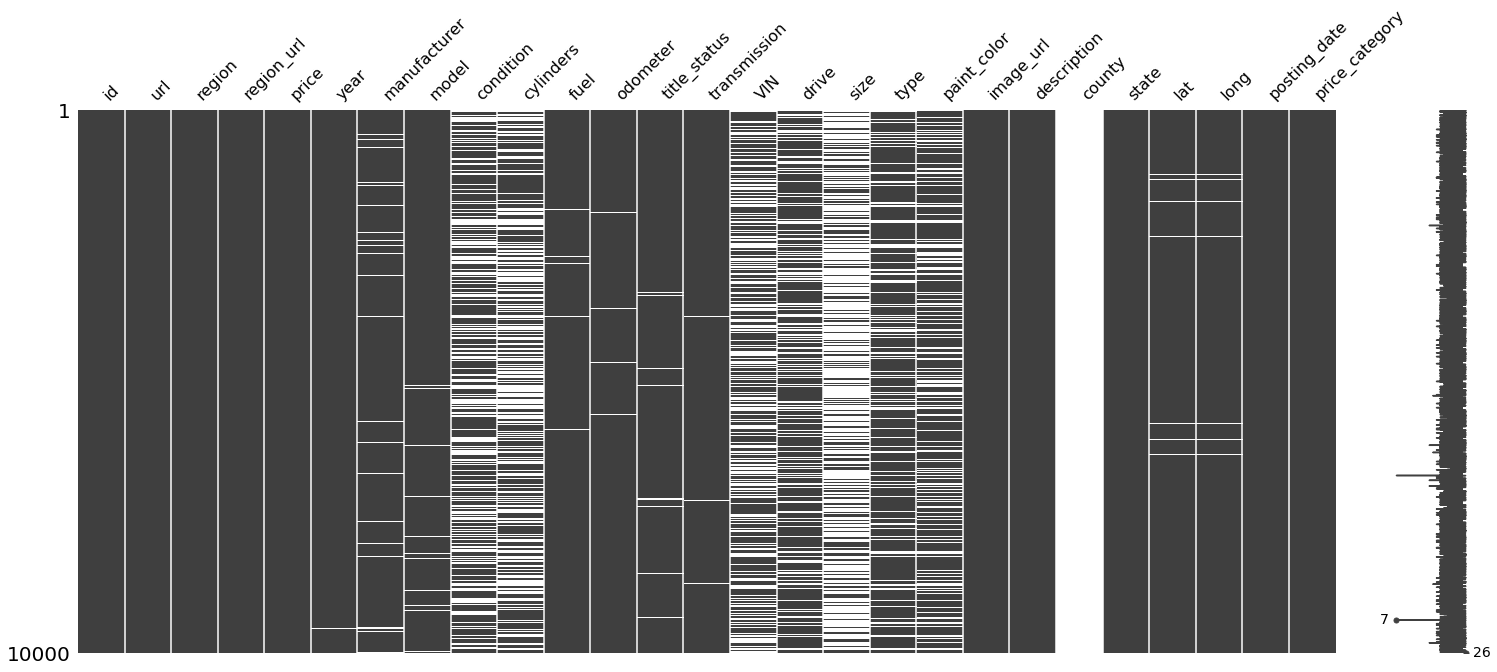

In [9]:
# Матрица пропусков по признакам. Для наглядности.
msno.matrix(df_copy);

In [10]:
# Узнаем процент пропущенных значений в каждом признаке
missing_values = ((df_copy.isna().sum()/len(df_copy))*100).sort_values(ascending=False)
print('Процент пропущенных значений для каждого признака:')
missing_values

Процент пропущенных значений для каждого признака:


county            100.00
size               71.91
cylinders          40.80
VIN                39.38
condition          37.66
drive              30.06
paint_color        29.50
type               21.94
manufacturer        3.82
title_status        1.66
model               1.28
long                0.98
lat                 0.98
fuel                0.63
transmission        0.45
odometer            0.43
year                0.36
posting_date        0.02
image_url           0.02
description         0.02
state               0.00
id                  0.00
url                 0.00
price               0.00
region_url          0.00
region              0.00
price_category      0.00
dtype: float64

In [11]:
# Удалим признаки (колонки таблицы), содержащие высокий процент пропусков (более 20%)
df_copy = df_copy.drop(columns=['county','size','cylinders','VIN','condition','drive','paint_color','type'])

In [12]:
# Удалим строки таблицы, где есть пропуски того или иного признака с небольшим процентом незаполненных ячеек от их общего числа.
df_copy = df_copy[~(df_copy.year.isna() | df_copy.odometer.isna() | df_copy.lat.isna() | df_copy.long.isna() | df_copy.posting_date.isna())]

In [13]:
# В оставшуюся часть незаполненных ячеек впишем значение "other" или чаще всего встречающееся значение.

df_copy.title_status = df_copy.title_status.fillna(df_copy.title_status.describe()['top'])

df_copy.manufacturer = df_copy.manufacturer.fillna('other')

df_copy.model = df_copy.model.fillna('other')

df_copy.transmission = df_copy.transmission.fillna('other')

df_copy.fuel = df_copy.fuel.fillna('other')

In [14]:
# Проверим, остались ли пропущенные значения в таблице
missing_values = ((df_copy.isna().sum()/len(df_copy))*100).sort_values(ascending=False)
print('Процент пропущенных значений для каждого признака:')
missing_values

Процент пропущенных значений для каждого признака:


id                0.0
title_status      0.0
posting_date      0.0
long              0.0
lat               0.0
state             0.0
description       0.0
image_url         0.0
transmission      0.0
odometer          0.0
url               0.0
fuel              0.0
model             0.0
manufacturer      0.0
year              0.0
price             0.0
region_url        0.0
region            0.0
price_category    0.0
dtype: float64

#### Проверка выбросов и их исправление.

In [15]:
# Нужно обратить внимание на такие категории, как 'price', 'year' и 'odometer'. 

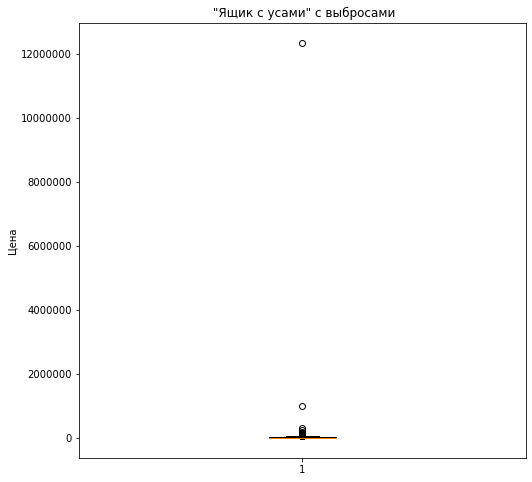

In [16]:
fig, ax = plt.subplots(figsize=(8,8))
ax.boxplot(df_copy.price)
ax.set_ylabel('Цена')
ax.set_title(' "Ящик с усами" с выбросами')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'));

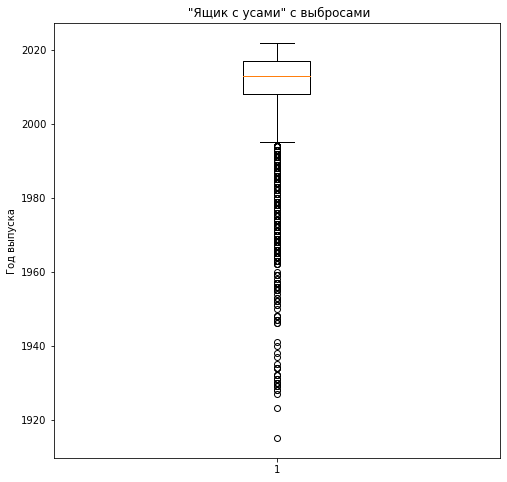

In [17]:
fig, ax = plt.subplots(figsize=(8,8))
ax.boxplot(df_copy.year)
ax.set_ylabel('Год выпуска')
ax.set_title(' "Ящик с усами" с выбросами')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'));

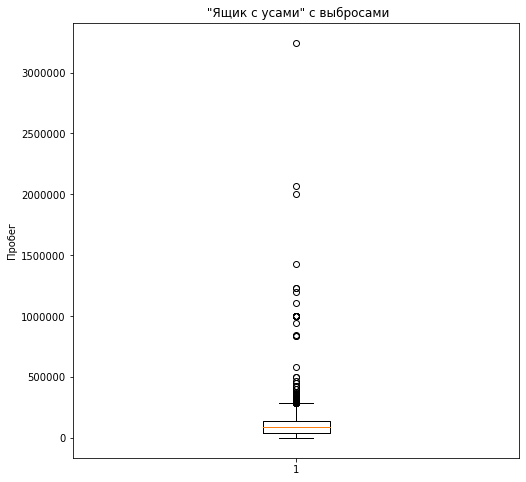

In [18]:
fig, ax = plt.subplots(figsize=(8,8))
ax.boxplot(df_copy.odometer)
ax.set_ylabel('Пробег')
ax.set_title(' "Ящик с усами" с выбросами')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'));

In [19]:
# На графиках выше можно заметить сильные выбросы в перечисленных выше категориях. 
# Выбросы нужно заменить на значения границ, в пределах которых лежат нормальные значения.
# Напишем функцию, определяющую нормальные границы

def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    
    boundaries = (q25 - 1.5*iqr, q75 + 1.5*iqr)
    
    return boundaries

In [20]:
# Создадим список признаков, в которых нужно устранить выбросы.
categories = ['price', 'odometer', 'year']

In [21]:
for category in categories:
    print(f"Нормальные границы для признака {category} : {calculate_outliers(df_copy[category])}")

Нормальные границы для признака price : (-22455.0, 58257.0)
Нормальные границы для признака odometer : (-108401.75, 285124.25)
Нормальные границы для признака year : (1994.5, 2030.5)


In [22]:
# Cоздадим функцию, которая будет подставлять в датафрейм границы нормальных значений на место выбросов
def replace_outlier (df_copy, category):
    boundaries = calculate_outliers(df_copy[category])
    is_outlier_less = (df_copy[category] < boundaries[0])
    is_outlier_more = (df_copy[category] > boundaries[1])
    df_copy.loc[is_outlier_less, category] = boundaries[0]
    df_copy.loc[is_outlier_more, category] = boundaries[1]
    return df_copy

In [23]:
# Используем функцию для наших выбранных признаков:
for category in categories:
    replace_outlier(df_copy, category)

In [24]:
# Проверим, устранены ли выбросы:
df_copy[['price','year','odometer']].describe()

,price,year,odometer
count,9827.000000,9827.000000,9827.000000
mean,18889.003460,2011.677521,93653.976595
std,13671.109953,6.481530,63437.666730
min,500.000000,1994.500000,0.000000
25%,7812.000000,2008.000000,39170.500000
50%,15590.000000,2013.000000,88888.000000
75%,27990.000000,2017.000000,137552.000000
max,58257.000000,2022.000000,285124.250000


### Data Transformation

In [25]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9827 entries, 0 to 10049
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              9827 non-null   int64  
 1   url             9827 non-null   object 
 2   region          9827 non-null   object 
 3   region_url      9827 non-null   object 
 4   price           9827 non-null   int64  
 5   year            9827 non-null   float64
 6   manufacturer    9827 non-null   object 
 7   model           9827 non-null   object 
 8   fuel            9827 non-null   object 
 9   odometer        9827 non-null   float64
 10  title_status    9827 non-null   object 
 11  transmission    9827 non-null   object 
 12  image_url       9827 non-null   object 
 13  description     9827 non-null   object 
 14  state           9827 non-null   object 
 15  lat             9827 non-null   float64
 16  long            9827 non-null   float64
 17  posting_date    9827 non-null   

In [26]:
# Изменим формат 'year' на int
df_copy.year = df_copy.year.astype(int)

In [27]:
# Формат 'posting_date' изменим со строкового на временной.
df_copy['posting_date'] = pd.to_datetime(df_copy.posting_date,utc=True)

### Feature Selection

In [28]:
# Проверим, как много автомобилей с годами производства, ближе к нашим дням, было продано.
data_year_count = df_copy.groupby(['year'], as_index = False)[['id']].count()
data_year_count.rename(columns={
    'year':'Год выпуска автомобиля',
    'id':'Кол-во выпущенных автомобилей'})

,Год выпуска автомобиля,Кол-во выпущенных автомобилей
0,1994,394
1,1995,33
2,1996,25
3,1997,43
4,1998,55
5,1999,80
6,2000,79
7,2001,121
8,2002,149
9,2003,185


In [29]:
print(f'Cредняя цена проданных автомобилей: {round(df_copy.price.describe().mean(), 3)}')
print(f'Cредняя цена проданных автомобилей с годом выпуска раньше 2021: {round(df_copy[df_copy.year < 2021].price.describe().mean(), 3)}')

for last_year in [2019, 2020, 2021, 2022]:
    print(f'Cредняя цена проданных автомобилей с {last_year} годом выпуска: {round(df_copy[df_copy.year == last_year].price.describe().mean(), 3)}')

print(f'Доля проданных автомобилей с 2021 и 2022 годом выпуска относительно всей выборки: {round(len(df_copy[(df_copy.year > 2020)])/len(df_copy)*100, 3)}%')

Cредняя цена проданных автомобилей: 19067.014
Cредняя цена проданных автомобилей с годом выпуска раньше 2021: 19044.067
Cредняя цена проданных автомобилей с 2019 годом выпуска: 25511.692
Cредняя цена проданных автомобилей с 2020 годом выпуска: 26947.54
Cредняя цена проданных автомобилей с 2021 годом выпуска: 24897.833
Cредняя цена проданных автомобилей с 2022 годом выпуска: 25461.189
Доля проданных автомобилей с 2021 и 2022 годом выпуска относительно всей выборки: 0.519%


In [30]:
# Очень мало данных о продажах автомобилей с 2021 и 2022 годом производства. 
# Можно удалить такие строки из датасета, чтобы модель не переобучилась.
df_copy = df_copy[~(df_copy.year == 2022)]

In [31]:
# Проверим силу и в целом само наличие линейной взаимосвязи между признаками датасета с помощью коэффициента корреляции Пирсона.
df_copy.corr()

,id,price,year,odometer,lat,long
id,1.000000,-0.092503,-0.098273,0.049347,-0.078152,-0.105855
price,-0.092503,1.000000,0.530331,-0.530725,-0.012059,-0.075512
year,-0.098273,0.530331,1.000000,-0.500735,-0.031487,0.008595
odometer,0.049347,-0.530725,-0.500735,1.000000,0.024612,0.007305
lat,-0.078152,-0.012059,-0.031487,0.024612,1.000000,-0.164699
long,-0.105855,-0.075512,0.008595,0.007305,-0.164699,1.000000


In [32]:
# Связи между признаками слабые. Выведем самые сильные из них.
df_corr = df_copy.corr()
df_corr = df_corr[['odometer','year','price']]
df_corr = df_corr[~(df_corr.year ** 2 < 0.16)]
df_corr

,odometer,year,price
price,-0.530725,0.530331,1.000000
year,-0.500735,1.000000,0.530331
odometer,1.000000,-0.500735,-0.530725


## Future Engineering

### Создадим новые признаки на основе информации в датафрейме c помощью lambda-функции.

In [33]:
# Возрастная категория указывает, старая машина или новая относительно года производства.
df_copy['age_category'] = df_copy.apply(lambda x: 'new' if x.year > 2013 else ('old' if x.year < 2006 else 'average'), axis=1)

In [34]:
# Количество символов в описании объявления
df_copy['desc_len'] = df_copy.apply(lambda x: len(x.description), axis=1)

In [35]:
# Сколько раз название модели автомобиля фигурирует в описании в объявлении.
df_copy['model_in_desc'] = df_copy.apply(lambda x: x.description.count(x.model), axis=1)

In [36]:
# Количество символов в названии модели
df_copy['model_len'] = df_copy.apply(lambda x: len(x.model), axis=1)

In [37]:
# Количество слов в названии автомобиля
df_copy['model_words_count'] = df_copy.apply(lambda x: len(x.model.split(' ')), axis=1)

In [38]:
# Месяц выхода объявления о продаже автомобиля.
df_copy['month'] = df_copy.posting_date.apply(lambda x: x.month)

In [39]:
# День недели, когда было выставлено объявление о продаже.
df_copy['day_of_week'] = df_copy['posting_date'].apply(lambda x: x.dayofweek+1)

In [40]:
# Разница между годом выпуска автомобиля и годом выставления объявления о продаже.
df_copy['diff_years'] = df_copy.apply(lambda x: x.posting_date.year - x.year,axis=1)

In [41]:
# Проверим, сколько существует уникальных наименований автомобилей в датафрейме.
df_copy['model'].nunique()

3428

In [42]:
# Очень много значений 'model'. Создадим признак, в котором будет отображаться только первое слово от наименования модели.
df_copy['short_model'] = df_copy.apply(lambda x: x.model.split(' ')[0], axis=1)

In [43]:
df_copy['short_model'].nunique()

967

In [44]:
# Посмотрим ещё раз, как признаки датасета взаимосвязаны друг с другом.
df_copy.corr()

,id,price,year,odometer,lat,long,desc_len,model_in_desc,model_len,model_words_count,month,day_of_week,diff_years
id,1.000000,-0.092503,-0.098273,0.049347,-0.078152,-0.105855,-0.028884,-0.014016,-0.047371,-0.049705,0.643639,-0.052681,0.098273
price,-0.092503,1.000000,0.530331,-0.530725,-0.012059,-0.075512,0.357217,0.035225,0.326429,0.324521,-0.084930,0.025972,-0.530331
year,-0.098273,0.530331,1.000000,-0.500735,-0.031487,0.008595,0.372269,0.021706,0.226739,0.252420,-0.079931,0.010266,-1.000000
odometer,0.049347,-0.530725,-0.500735,1.000000,0.024612,0.007305,-0.307507,0.014102,-0.246988,-0.270760,0.039602,-0.027143,0.500735
lat,-0.078152,-0.012059,-0.031487,0.024612,1.000000,-0.164699,0.021282,-0.009310,0.004447,-0.006042,-0.056904,-0.014500,0.031487
long,-0.105855,-0.075512,0.008595,0.007305,-0.164699,1.000000,-0.082885,-0.011687,0.008763,0.011058,-0.123189,-0.007410,-0.008595
desc_len,-0.028884,0.357217,0.372269,-0.307507,0.021282,-0.082885,1.000000,0.127113,0.152992,0.155470,-0.036972,0.018380,-0.372269
model_in_desc,-0.014016,0.035225,0.021706,0.014102,-0.009310,-0.011687,0.127113,1.000000,-0.125078,-0.106673,-0.022112,-0.017689,-0.021706
model_len,-0.047371,0.326429,0.226739,-0.246988,0.004447,0.008763,0.152992,-0.125078,1.000000,0.933846,-0.015196,0.009857,-0.226739
model_words_count,-0.049705,0.324521,0.252420,-0.270760,-0.006042,0.011058,0.155470,-0.106673,0.933846,1.000000,-0.008744,0.008901,-0.252420


### Преобразование категориальных данных с помощью OneHotEncoder

In [45]:
# Cоздадим объект класса OneHotEncoder.
ohe = OneHotEncoder(sparse=False)

In [46]:
# Выберем интересующие нас категориальные признаки.
data = df_copy[['region','fuel','manufacturer','title_status','transmission','state','age_category','short_model']]

In [47]:
data.head()

,region,fuel,manufacturer,title_status,transmission,state,age_category,short_model
0,chattanooga,diesel,ram,clean,other,tn,new,2500
1,north jersey,other,ford,clean,automatic,nj,new,explorer
2,reno / tahoe,gas,volkswagen,clean,other,ca,new,golf
3,fayetteville,gas,toyota,clean,automatic,nc,average,rav4
4,new york city,gas,nissan,clean,automatic,ny,new,altima


In [48]:
# Идентифицируем параметры преобразования на датафрейме с категориальными переменными.
ohe.fit(data)

OneHotEncoder(sparse=False)

In [49]:
# С помощью метода .transform() применим преобразование с заданными параметрами на тех же данных и отобразим их результат.
ohe_data = ohe.transform(data)
print(f'{ohe_data.shape}\n')
print(f'{type(ohe_data)}\n')
print(ohe_data)

(9824, 1468)

<class 'numpy.ndarray'>

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [50]:
# Удобное отображение категорий для каждого вектора в строке датафрейма.
ohe.inverse_transform(ohe_data)

array([['chattanooga', 'diesel', 'ram', ..., 'tn', 'new', '2500'],
       ['north jersey', 'other', 'ford', ..., 'nj', 'new', 'explorer'],
       ['reno / tahoe', 'gas', 'volkswagen', ..., 'ca', 'new', 'golf'],
       ...,
       ['salem', 'gas', 'audi', ..., 'or', 'average', 'a3'],
       ['madison', 'hybrid', 'porsche', ..., 'wi', 'new', 'cayenne'],
       ['norfolk / hampton roads', 'gas', 'ram', ..., 'va', 'new',
        '1500']], dtype=object)

In [51]:
# Выведем новые наименования признаков с помощью метода get_feature_names_out()
ohe.get_feature_names_out()

array(['region_SF bay area', 'region_abilene', 'region_akron / canton',
       ..., 'short_model_z4', 'short_model_zephyr', 'short_model_zx2'],
      dtype=object)

In [52]:
# Добавим новые признаки в датафрейм с основными данными.
df_copy[ohe.get_feature_names_out()] = ohe_data
df_copy.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,short_model_xterra,short_model_xts,short_model_xv,short_model_yaris,short_model_yukon,short_model_z,short_model_z3,short_model_z4,short_model_zephyr,short_model_zx2
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021,nissan,altima,gas,8000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Нормализация данных

In [53]:
# Укажем признаки, значения в которых нужно нормализовать.
data_std = df_copy[['odometer', 'year', 'long','lat',
                    'desc_len', 'model_in_desc', 'model_len', 
                    'model_words_count','month', 'day_of_week', 'diff_years']]

data_std.head()

,odometer,year,long,lat,desc_len,model_in_desc,model_len,model_words_count,month,day_of_week,diff_years
0,27442.0,2020,-85.250000,35.060000,4482,0,22,5,4,6,1
1,60023.0,2016,-74.061962,40.821805,968,0,20,4,5,1,5
2,14048.0,2017,-84.411811,33.779214,4286,0,16,3,4,3,4
3,117291.0,2013,-78.655304,35.715954,3241,0,4,1,4,6,8
4,8000.0,2021,-73.609700,40.654800,538,0,6,1,5,1,0


In [54]:
# Создадим объект std_scaler класса StandardScaler с параметрами по умолчанию, который будет отвечать за стандартизацию.
std_scaler = StandardScaler()

In [55]:
# Идентифицируем параметры преобразования на датафрейме с количественными переменными c помощью метода .fit()
std_scaler.fit(data_std)

StandardScaler()

In [56]:
# Применим преобразование для датафрейма с количественными переменными и сохраним в новую переменную.
std_scaled = std_scaler.transform(data_std)
print(f'{std_scaled.shape}\n')
print(f'{type(std_scaled)}\n')
print(std_scaled)

(9824, 11)

<class 'numpy.ndarray'>

[[-1.04402956  1.27739746  0.48825634 ... -0.614687    1.11883832
  -1.27739746]
 [-0.53014729  0.66515407  1.10573553 ...  1.62684422 -1.37582071
  -0.66515407]
 [-1.25528579  0.81821492  0.53451684 ... -0.614687   -0.37795709
  -0.81821492]
 ...
 [ 0.89191279 -0.10015015 -1.59425265 ... -0.614687    0.12097471
   0.10015015]
 [-0.49986418  0.51209323  0.25933526 ... -0.614687   -0.37795709
  -0.51209323]
 [-0.91029494  0.81821492  0.98221593 ... -0.614687    1.11883832
  -0.81821492]]


In [57]:
# Добавим новые признаки в датафрейм с основными данными.
df_copy[['odometer', 'year', 'long','lat', 'desc_len', 
         'model_in_desc', 'model_len', 'model_words_count',
         'month', 'day_of_week', 'diff_years']] = std_scaled
df_copy.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,short_model_xterra,short_model_xts,short_model_xv,short_model_yaris,short_model_yukon,short_model_z,short_model_z3,short_model_z4,short_model_zephyr,short_model_zx2
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,1.277397,ram,2500 crew cab big horn,diesel,-1.044030,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,0.665154,ford,explorer 4wd 4dr xlt,other,-0.530147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,0.818215,volkswagen,golf r hatchback,gas,-1.255286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,0.205972,toyota,rav4,gas,0.373110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,1.430458,nissan,altima,gas,-1.350678,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
# Посмотрим на список признаков в нашем датафрейме.
df_copy.columns.tolist()

['id',
 'url',
 'region',
 'region_url',
 'price',
 'year',
 'manufacturer',
 'model',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'image_url',
 'description',
 'state',
 'lat',
 'long',
 'posting_date',
 'price_category',
 'age_category',
 'desc_len',
 'model_in_desc',
 'model_len',
 'model_words_count',
 'month',
 'day_of_week',
 'diff_years',
 'short_model',
 'region_SF bay area',
 'region_abilene',
 'region_akron / canton',
 'region_albany',
 'region_albuquerque',
 'region_altoona-johnstown',
 'region_amarillo',
 'region_ames',
 'region_anchorage / mat-su',
 'region_ann arbor',
 'region_annapolis',
 'region_appleton-oshkosh-FDL',
 'region_asheville',
 'region_ashtabula',
 'region_athens',
 'region_atlanta',
 'region_auburn',
 'region_augusta',
 'region_austin',
 'region_bakersfield',
 'region_baltimore',
 'region_baton rouge',
 'region_battle creek',
 'region_beaumont / port arthur',
 'region_bellingham',
 'region_bemidji',
 'region_bend',
 'region_billings',
 'region_

### Удалим неинформативные колонки

In [59]:
columns_for_drop = ['id','url', 'region', 'region_url', 'year', 'manufacturer',
                    'model', 'fuel', 'odometer', 'title_status', 'transmission',
                    'image_url', 'description', 'state', 'lat', 'long', 'posting_date', 
                    'price', 'desc_len', 'model_in_desc', 
                    'age_category', 'model_len', 'model_words_count','short_model',
                    'month', 'day_of_week', 'diff_years']

In [60]:
for column in columns_for_drop:
    df_copy = df_copy.drop(columns=[column])

In [61]:
df_copy.head()

,price_category,region_SF bay area,region_abilene,region_akron / canton,region_albany,region_albuquerque,region_altoona-johnstown,region_amarillo,region_ames,region_anchorage / mat-su,...,short_model_xterra,short_model_xts,short_model_xv,short_model_yaris,short_model_yukon,short_model_z,short_model_z3,short_model_z4,short_model_zephyr,short_model_zx2
0,high,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,medium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,high,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,medium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,medium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Modeling

### Разделение выборки на тренировочную и тестовую. Обозначение целевой переменной.

In [62]:
# Разделим выборку на фичи и целевую переменную.
x = df_copy.drop(['price_category'], axis=1)
y = df_copy['price_category']

In [63]:
# Разделим выборку на тренировочную и тестовую
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=50)

In [64]:
# Попробуем обучить несколько моделей и выберем наилучшую.

### Первая модель: "случайный лес"

In [102]:
# Зададим параметры модели
RFCl = RandomForestClassifier(random_state=50)

In [103]:
# Обучим модель на тренировочных данных.
RFCl.fit(x_train, y_train)

RandomForestClassifier(random_state=50)

In [104]:
# Cделаем предсказания на тренировочной и тестовой выборке. Посмотрим, как модель обучилась.
RFCl_predicted_train = RFCl.predict(x_train)
RFCl_predicted_test = RFCl.predict(x_test)

In [105]:
print(f'Точность предсказания на тренировочной выборке: {accuracy_score(y_train, RFCl_predicted_train)}')
print(f'Точность предсказания на тестовой выборке: {accuracy_score(y_test, RFCl_predicted_test)}')

Точность предсказания на тренировочной выборке: 0.9921465968586387
Точность предсказания на тестовой выборке: 0.7184531886024423


### Вторая модель: логистическая регрессия.

In [110]:
# Зададим параметры модели
LogReg = LogisticRegression(C=50, solver='saga', penalty='l2', max_iter=1000, random_state=300)

In [111]:
# Обучим модель на тренировочных данных.
LogReg.fit(x_train, y_train)

LogisticRegression(C=50, max_iter=1000, random_state=300, solver='saga')

In [112]:
# Cделаем предсказания на тренировочной и тестовой выборке. Посмотрим, как модель обучилась.
LogReg_predicted_train = LogReg.predict(x_train)
LogReg_predicted_test = LogReg.predict(x_test)

In [113]:
print(f'Точность предсказания на тренировочной выборке: {accuracy_score(y_train, LogReg_predicted_train)}')
print(f'Точность предсказания на тестовой выборке: {accuracy_score(y_test, LogReg_predicted_test)}')

Точность предсказания на тренировочной выборке: 0.8368237347294939
Точность предсказания на тестовой выборке: 0.7194708276797829


### Третья модель: многослойный персептрон.

In [114]:
# Зададим параметры модели
MLPCl = MLPClassifier(random_state=50, max_iter=500, hidden_layer_sizes=(100,20), activation='logistic')

In [115]:
# Обучим модель на тренировочных данных.
MLPCl.fit(x_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 20), max_iter=500,
              random_state=50)

In [116]:
# Cделаем предсказания на тренировочной и тестовой выборке. Посмотрим, как модель обучилась.
MLPCl_predicted_train = MLPCl.predict(x_train)
MLPCl_predicted_test = MLPCl.predict(x_test)

In [117]:
print(f'Точность предсказания на тренировочной выборке: {accuracy_score(y_train, MLPCl_predicted_train)}')
print(f'Точность предсказания на тестовой выборке: {accuracy_score(y_test, MLPCl_predicted_test)}')

Точность предсказания на тренировочной выборке: 0.9339732402559627
Точность предсказания на тестовой выборке: 0.7038670284938942


## Evaluation

### Сравнение качества моделей с помощью кросс-валидации

In [118]:
models = [RFCl, LogReg, MLPCl]

In [119]:
for model in models:
    cv_score = cross_val_score(model, x, y, cv=5)
    print(f'Используемая модель: {model}')
    print(f'Средняя точность предсказания на разных выборках: {cv_score.mean()}')
    print(f'Разброс в точности предсказаний на разных выборках: {cv_score.std()}\n')

Используемая модель: RandomForestClassifier(random_state=50)
Средняя точность предсказания на разных выборках: 0.7293356757513099
Разброс в точности предсказаний на разных выборках: 0.005782835965076468

Используемая модель: LogisticRegression(C=50, max_iter=1000, random_state=300, solver='saga')
Средняя точность предсказания на разных выборках: 0.7157979509025045
Разброс в точности предсказаний на разных выборках: 0.007664660977465427

Используемая модель: MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 20), max_iter=500,
              random_state=50)
Средняя точность предсказания на разных выборках: 0.7022613143452372
Разброс в точности предсказаний на разных выборках: 0.015933075352188217



## Results

In [120]:
# Кросс-валидация показала, что самые лучшие показатели у модели "случайного леса": 
# высокая предсказательная способность и небольшой разброс в предсказаниях при подстановке других данных. Сохраним её.

In [121]:
# Cоздадим серилизованный объект, в который положим нашу лучшую модель.
file_name = 'model.pickle'
with open(file_name, 'wb') as file:
    pickle.dump(RFCl, file)

In [122]:
# Проверим, сохранилась ли информация.
with open ('model.pickle', 'rb') as file:
    model_from_pickle = pickle.load(file)

In [123]:
model_from_pickle

RandomForestClassifier(random_state=50)

In [ ]:
# Информация сохранилась. Нашу модель можно передавать и использовать.